In [328]:
# Import All the Data Science Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")
from pandas_datareader import data as pdr

In [329]:
# Download Data
# Finance Stocks: JPM, MS, BAC
# JPM: JP Morgan
# MS: Morgan Stanley
# BAC: Bank of America
tickers=['JPM', 'MS', 'BAC']
start_date='2024-01-01'
end_date='2025-01-01'
data=yf.download(tickers, start=start_date, end=end_date)['Close']
data.head()

[*********************100%***********************]  3 of 3 completed


Ticker,BAC,JPM,MS
Date,,,
2024-01-02,32.310410,164.582642,88.132111
2024-01-03,31.957752,163.865326,86.264366
2024-01-04,32.215096,164.952759,86.489616
2024-01-05,32.815559,165.780350,87.512657
2024-01-08,32.558220,165.539780,87.766075


Visualizing Our Stock Data

In [330]:
# Visualize for BAC
px.line(data, x=data.index, y='BAC', title='Closing Price for BAC')

In [331]:
# Visualize for JPM
px.line(data, x=data.index, y='JPM', title='Closing Price for JPM', color_discrete_sequence=['Green'])

In [332]:
# Visualize for MS
px.line(data, x=data.index, y='MS', title='Closing Price for MS',color_discrete_sequence=['Red'])

In [333]:
px.line(data, title="Closing Price of Stocks").show()

In [334]:
data.head()

Ticker,BAC,JPM,MS
Date,,,
2024-01-02,32.310410,164.582642,88.132111
2024-01-03,31.957752,163.865326,86.264366
2024-01-04,32.215096,164.952759,86.489616
2024-01-05,32.815559,165.780350,87.512657
2024-01-08,32.558220,165.539780,87.766075


In [335]:
# Simple return => (St-St-1)/St-1
simple_returns=data.pct_change()
simple_returns=simple_returns.dropna()
simple_returns.head()


Ticker,BAC,JPM,MS
Date,,,
2024-01-03,-0.010915,-0.004358,-0.021193
2024-01-04,0.008053,0.006636,0.002611
2024-01-05,0.018639,0.005017,0.011828
2024-01-08,-0.007842,-0.001451,0.002896
2024-01-09,-0.015515,-0.007906,-0.015506


In [337]:
# Log Return => ln(St/St-1)
log_return=np.log(data/data.shift(1))
log_return=log_return.dropna()
log_return.head()

Ticker,BAC,JPM,MS
Date,,,
2024-01-03,-0.010975,-0.004368,-0.021420
2024-01-04,0.008020,0.006614,0.002608
2024-01-05,0.018468,0.005005,0.011759
2024-01-08,-0.007873,-0.001452,0.002892
2024-01-09,-0.015637,-0.007938,-0.015628


In [384]:
corr_matrix=simple_returns.corr()
fig = px.imshow(corr_matrix,color_continuous_scale="RdBu",zmin=-1,zmax=1,title="Pairwise Correlation of Asset Returns")
fig.update_layout(title_x=0.5,width=550,height=450,xaxis_title="Assets", yaxis_title="Assets")
fig.show()

In [383]:
corr_matrix=log_return.corr()
fig = px.imshow(corr_matrix,color_continuous_scale="RdBu",zmin=-1,zmax=1,title="Pairwise Correlation of Asset Returns")
fig.update_layout(title_x=0.5,width=550,height=450,xaxis_title="Assets", yaxis_title="Assets")
fig.show()

In [339]:
# Portfolio Simple Return => (Rp=w1r1+w2r2+w3r3)=>[w1 w2 w3].[r1 r2 r3]
weights=np.array([1/3,1/3,1/3])
portfolio_simple_returns=simple_returns.dot(weights)
portfolio_simple_returns.head()

Date
2024-01-03   -0.012155
2024-01-04    0.005767
2024-01-05    0.011828
2024-01-08   -0.002132
2024-01-09   -0.012976
dtype: float64

In [340]:
portfolio_simple_returns.describe()

count    251.000000
mean       0.001400
std        0.013567
min       -0.049699
25%       -0.005938
50%        0.001516
75%        0.007562
max        0.105284
dtype: float64

In [341]:
# Portfolio log Return
weights=np.array([1/3,1/3,1/3])
portfolio_log_returns=log_return.dot(weights)
portfolio_log_returns.head()

Date
2024-01-03   -0.012254
2024-01-04    0.005747
2024-01-05    0.011744
2024-01-08   -0.002144
2024-01-09   -0.013067
dtype: float64

In [342]:
portfolio_log_returns.describe()

count    251.000000
mean       0.001285
std        0.013436
min       -0.051000
25%       -0.005959
50%        0.001512
75%        0.007517
max        0.100012
dtype: float64

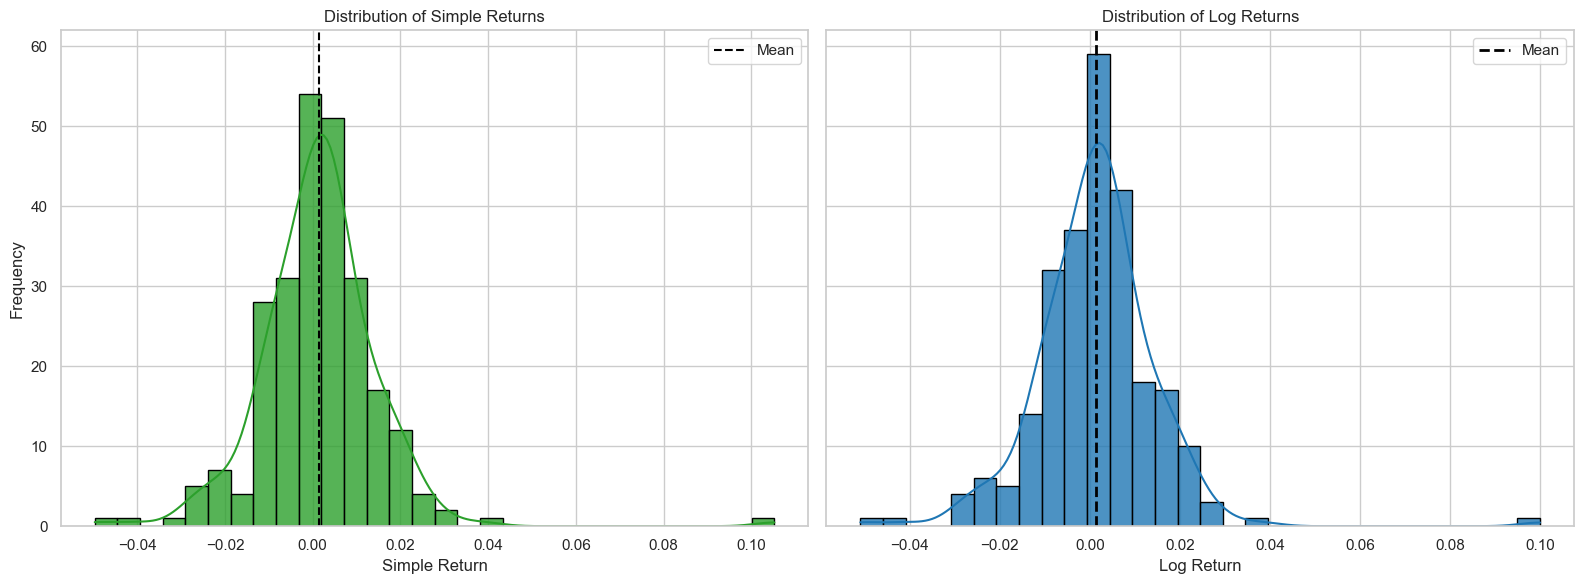

In [343]:

fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
sns.histplot(portfolio_simple_returns,bins=30,kde=True,ax=axs[0],color="#2ca02c",edgecolor="black",alpha=0.8)
axs[0].axvline(np.mean(portfolio_simple_returns),color="black",linestyle="--",linewidth=1.5,label="Mean")
axs[0].set_title("Distribution of Simple Returns")
axs[0].set_xlabel("Simple Return")
axs[0].set_ylabel("Frequency")
axs[0].legend()

sns.histplot(portfolio_log_returns,bins=30,kde=True,ax=axs[1],color="#1f77b4",edgecolor="black",alpha=0.8)

axs[1].axvline(np.mean(portfolio_log_returns),color="black",linestyle="--",linewidth=2,label="Mean")
axs[1].set_title("Distribution of Log Returns")
axs[1].set_xlabel("Log Return")
axs[1].legend()

plt.tight_layout()
plt.show()

In [344]:
portfolio_simple_returns.skew(), portfolio_simple_returns.kurtosis()

(np.float64(1.4582203054240233), np.float64(13.854703937492957))

In [345]:
portfolio_log_returns.skew(), portfolio_log_returns.kurtosis()

(np.float64(1.1902109737376572), np.float64(11.932547061995942))

In [346]:
# Annualized Simple Return
annualized_simple_return=((1+portfolio_simple_returns.mean())**252)-1
print(annualized_simple_return)

0.4227827461327567


In [347]:
# Annualized Log Return
annualized_log_return=(portfolio_log_returns.mean())*252
print(annualized_log_return)

0.3237646201839417


In [348]:
# Volatility
daily_volatility=np.std(portfolio_simple_returns)
annualized_volatility=daily_volatility*np.sqrt(252)
print(annualized_volatility)

0.21494247893442459


In [349]:
# Download Benchmark Data (S&P 500)
benchmark=yf.download('^GSPC', start=start_date, end=end_date)['Close']
benchmark.head()

[*********************100%***********************]  1 of 1 completed

Ticker,^GSPC
Date,
2024-01-02,4742.830078
2024-01-03,4704.810059
2024-01-04,4688.680176
2024-01-05,4697.240234
2024-01-08,4763.540039


In [350]:
benchmark = benchmark.pct_change().dropna()
aligned = pd.concat([portfolio_simple_returns, benchmark],axis=1).dropna()
aligned.columns = ['Portfolio', 'Market']

In [351]:
aligned.corr()

,Portfolio,Market
Portfolio,1.000000,0.527528
Market,0.527528,1.000000


In [352]:
# Converting to the Same Format
portfolio_returns=portfolio_simple_returns.to_numpy().flatten()
benchmark_returns=benchmark.to_numpy().flatten()

In [353]:
# Static CAPM Model analysis
import statsmodels.api as sm
risk_free_rate = 0.07
rf_daily = risk_free_rate / 252
excess_portfolio = aligned['Portfolio'] - rf_daily
excess_market = aligned['Market'] - rf_daily
X = sm.add_constant(excess_market)
capm_model = sm.OLS(excess_portfolio, X).fit()
print(capm_model.summary())

                            OLS Regression Results                            
Dep. Variable:              Portfolio   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     96.01
Date:                Wed, 24 Dec 2025   Prob (F-statistic):           2.20e-19
Time:                        19:41:26   Log-Likelihood:                 764.60
No. Observations:                 251   AIC:                            -1525.
Df Residuals:                     249   BIC:                            -1518.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.001      0.784      0.4

In [354]:
alpha = capm_model.params[0]
beta = capm_model.params[1]
print("CAPM Alpha:", alpha)
print("CAPM Beta:", beta)
print("CAPM Alpha p-value:", capm_model.pvalues[0])
# Beta =0.89<1 => Our Portfolio is less volatile than the market
# For every 1% change in the market, our portfolio tends to change by 0.89 % in the same direction

CAPM Alpha: 0.0005734341249099438
CAPM Beta: 0.897568395380774
CAPM Alpha p-value: 0.43359124021212314


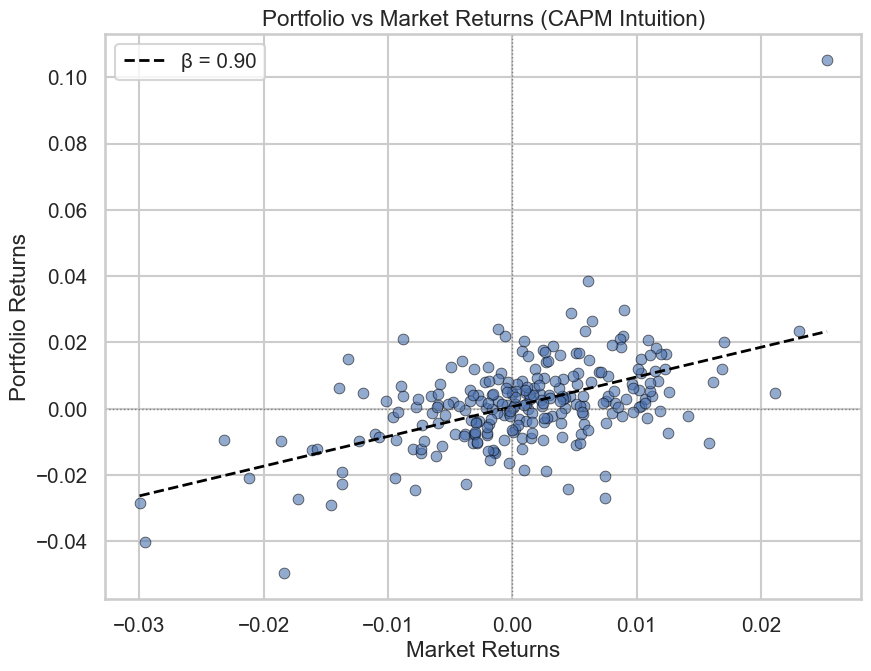

In [355]:
sns.set_theme(style="whitegrid",context="talk",font_scale=0.9)
plt.figure(figsize=(9, 7))
sns.scatterplot(data=aligned,x='Market',y='Portfolio',alpha=0.6,s=60,edgecolor='black')
# OLS regression line (CAPM intuition)
beta, alpha = np.polyfit(aligned['Market'], aligned['Portfolio'], 1)
x_vals = np.linspace(aligned['Market'].min(), aligned['Market'].max(), 100)
plt.plot(x_vals,alpha + beta * x_vals,color='black',linestyle='--',linewidth=2,label=f"β = {beta:.2f}")

plt.axhline(0, color='grey', linestyle=':', linewidth=1)
plt.axvline(0, color='grey', linestyle=':', linewidth=1)

plt.xlabel("Market Returns")
plt.ylabel("Portfolio Returns")
plt.title("Portfolio vs Market Returns (CAPM Intuition)")
plt.legend()
plt.tight_layout()
plt.show()

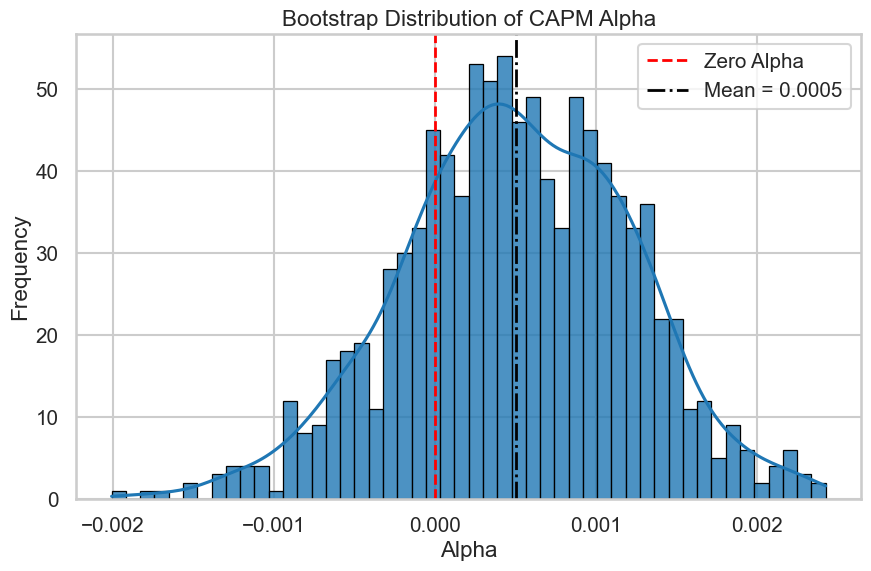

CAPM Alpha 95% CI: [-0.0009, 0.0019]


In [356]:
# Bootstrap CAPM Alpha
np.random.seed(42)
n_boot = 1000
boot_alpha_capm = []

capm_df = pd.concat([excess_portfolio, excess_market],axis=1).dropna()
capm_df.columns = ['Portfolio', 'Market']

for _ in range(n_boot):
    sample = capm_df.sample(frac=1, replace=True)

    y = sample['Portfolio']
    X = sm.add_constant(sample['Market'])

    model = sm.OLS(y, X).fit()
    boot_alpha_capm.append(model.params['const'])

sns.set_theme(style="whitegrid",context="talk",font_scale=0.9)
boot_alpha_capm = np.array(boot_alpha_capm)
plt.figure(figsize=(9, 6))
sns.histplot(boot_alpha_capm,bins=50,kde=True,color="#1f77b4",edgecolor="black",alpha=0.8)
plt.axvline(0,color="red",linestyle="--",linewidth=2,label="Zero Alpha")

# Mean alpha
mean_alpha = boot_alpha_capm.mean()
plt.axvline(mean_alpha,color="black",linestyle="-.",linewidth=2,label=f"Mean = {mean_alpha:.4f}")

plt.title("Bootstrap Distribution of CAPM Alpha")
plt.xlabel("Alpha")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

# 95% Confidence Interval
ci = np.percentile(boot_alpha_capm, [2.5, 97.5])
print(f"CAPM Alpha 95% CI: [{ci[0]:.4f}, {ci[1]:.4f}]")

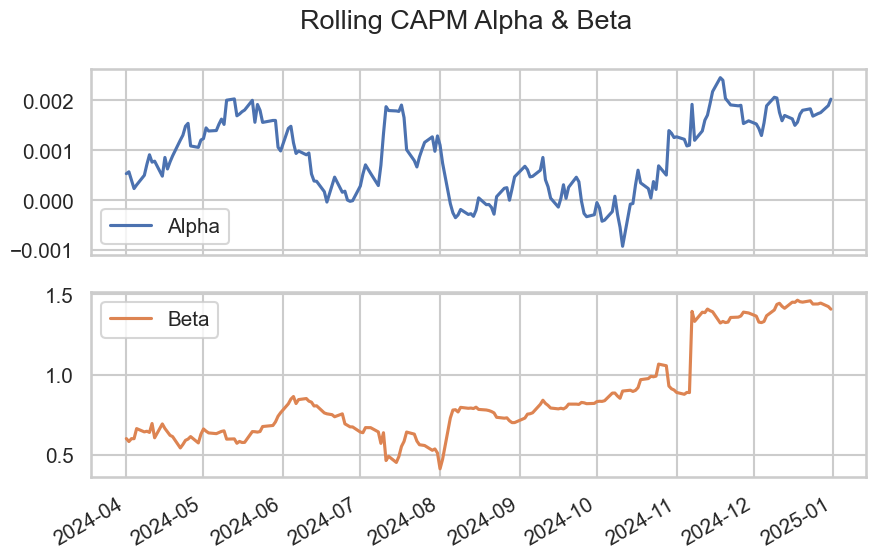

In [357]:
# Rolling CAPM Model
window = 60  

rolling_beta = []
rolling_alpha = []
dates = []

for i in range(window, len(excess_portfolio)):
    y = excess_portfolio[i-window:i]
    X = excess_market[i-window:i]
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    rolling_alpha.append(model.params[0])
    rolling_beta.append(model.params[1])
    dates.append(portfolio_simple_returns.index[i])
rolling_df = pd.DataFrame({'Alpha': rolling_alpha,'Beta': rolling_beta}, index=dates)
rolling_df.plot(subplots=True, figsize=(10,6), title='Rolling CAPM Alpha & Beta')
plt.show()


In [358]:
print(np.std(rolling_alpha))
print(np.mean(np.abs(rolling_alpha)))
print(model.resid.std())

0.0007619090628811914
0.0009536302297889473
0.014674366492497062


In [359]:
print(np.std(rolling_beta))
print(np.mean(np.abs(rolling_beta)))

0.2891462380558479
0.8565693682048062


In [360]:
# Static FF Model
ff_factors = pdr.DataReader('F-F_Research_Data_Factors','famafrench',start_date,end_date)[0]
ff_factors = ff_factors / 100 
ff_factors.index = ff_factors.index.to_timestamp()
ff_data = pd.concat([portfolio_simple_returns, ff_factors],axis=1).dropna()
ff_data.columns = ['Portfolio', 'MKT', 'SMB', 'HML', 'RF']
cess_portfolio_ff = ff_data['Portfolio'] - ff_data['RF']
excess_market_ff = ff_data['MKT']
X_ff = ff_data[['MKT', 'SMB', 'HML']]
excess_portfolio_ff = ff_data['Portfolio'] - ff_data['RF']
excess_market_ff = ff_data['MKT']
X_ff = sm.add_constant(X_ff)
ff_model = sm.OLS(excess_portfolio_ff, X_ff).fit()
print(ff_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     6.380
Date:                Wed, 24 Dec 2025   Prob (F-statistic):             0.0527
Time:                        19:41:31   Log-Likelihood:                 33.035
No. Observations:                   8   AIC:                            -58.07
Df Residuals:                       4   BIC:                            -57.75
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0094      0.002     -3.822      0.0

In [361]:
ff_alpha = ff_model.params['const']
ff_alpha_pval = ff_model.pvalues['const']
ff_r2 = ff_model.rsquared

print("Static FF Alpha:", ff_alpha)
print("Static FF Alpha p-value:", ff_alpha_pval)
print("Static FF R-squared:", ff_r2)

Static FF Alpha: -0.009356032499512444
Static FF Alpha p-value: 0.018738759230772103
Static FF R-squared: 0.8271300629582513


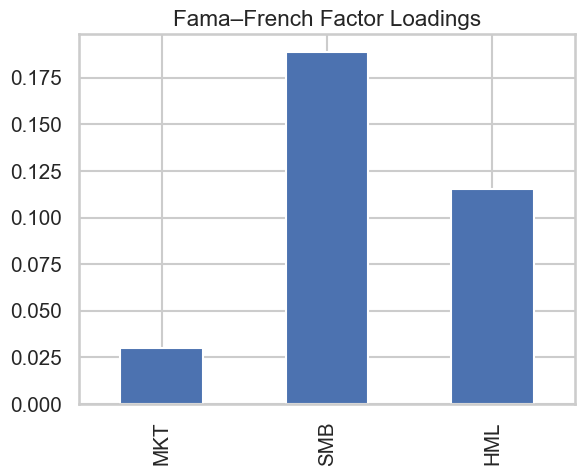

In [362]:
ff_model.params[['MKT', 'SMB', 'HML']].plot(kind='bar') 
plt.title("Fama–French Factor Loadings") 
plt.show()

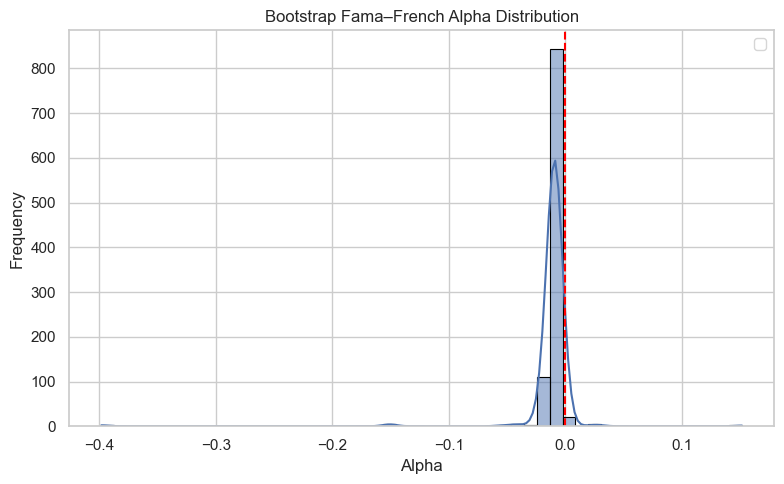

FF Alpha 95% CI: [-0.02184597 -0.00196592]


In [363]:
# Bootstrap Fama-French Alpha
np.random.seed(42)
n_boot = 1000
boot_alpha_ff = []

ff_boot_df = ff_data.copy()
ff_boot_df['Excess_Portfolio'] = ff_boot_df['Portfolio'] - ff_boot_df['RF']

for _ in range(n_boot):
    sample = ff_boot_df.sample(frac=1, replace=True)
    y = sample['Excess_Portfolio']
    X = sm.add_constant(sample[['MKT', 'SMB', 'HML']])
    model = sm.OLS(y, X).fit()
    boot_alpha_ff.append(model.params['const'])

sns.set_theme(style="whitegrid")
boot_alpha_ff = np.array(boot_alpha_ff)
plt.figure(figsize=(8, 5))
sns.histplot(boot_alpha_ff,bins=50,kde=True,color="#4c72b0",edgecolor="black")
plt.axvline(0, color='red', linestyle='--', linewidth=1.5)
plt.title("Bootstrap Fama–French Alpha Distribution")
plt.xlabel("Alpha")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

print("FF Alpha 95% CI:", np.percentile(boot_alpha_ff, [2.5, 97.5]))

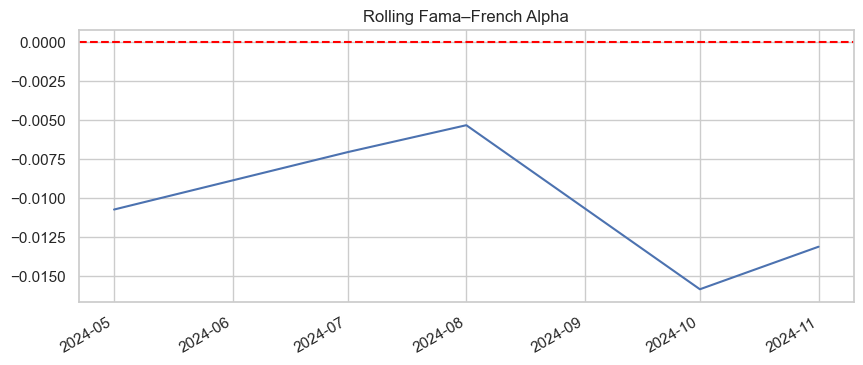

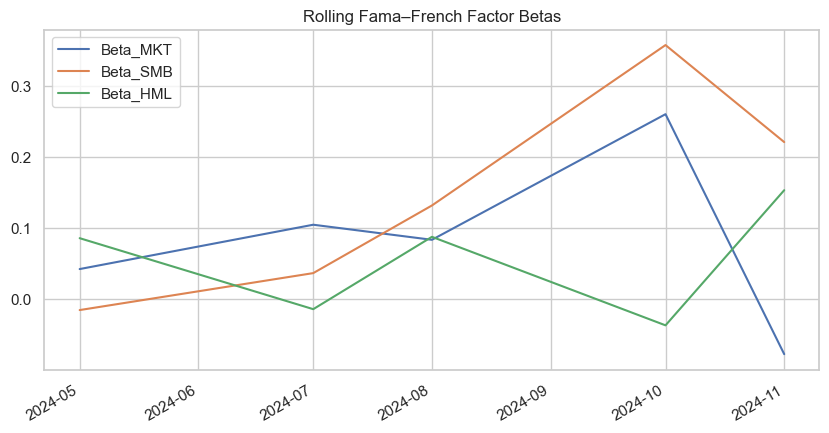

In [364]:
# Rolling FF model
window = 3

rolling_results = {
    'Alpha': [],
    'Beta_MKT': [],
    'Beta_SMB': [],
    'Beta_HML': []
}

rolling_ff_dates = []

for i in range(window, len(ff_data)):
    y = excess_portfolio_ff.iloc[i-window:i]
    X = ff_data[['MKT', 'SMB', 'HML']].iloc[i-window:i]
    X = sm.add_constant(X)

    model = sm.OLS(y, X).fit()

    rolling_results['Alpha'].append(model.params['const'])
    rolling_results['Beta_MKT'].append(model.params['MKT'])
    rolling_results['Beta_SMB'].append(model.params['SMB'])
    rolling_results['Beta_HML'].append(model.params['HML'])
    rolling_ff_dates.append(ff_data.index[i])

rolling_ff_df = pd.DataFrame(rolling_results,index=pd.to_datetime(rolling_ff_dates))    
rolling_ff_df['Alpha'].plot(figsize=(10,4), title='Rolling Fama–French Alpha')
plt.axhline(0, color='red', linestyle='--')
plt.show()
rolling_ff_df[['Beta_MKT', 'Beta_SMB', 'Beta_HML']].plot(figsize=(10,5))
plt.title('Rolling Fama–French Factor Betas')
plt.show()



### Market Vs Benchmark returns

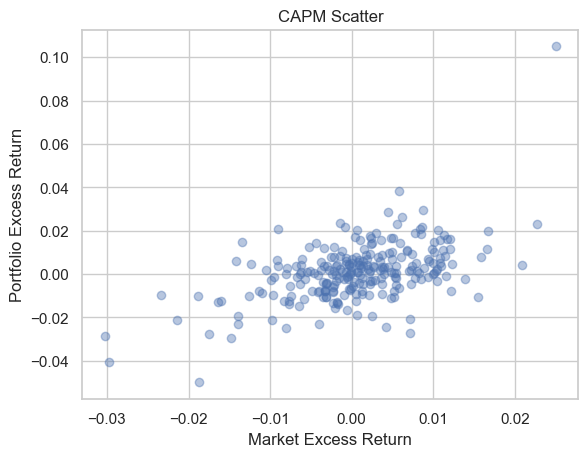

In [365]:
plt.scatter(excess_market, excess_portfolio, alpha=0.4)
plt.xlabel('Market Excess Return')
plt.ylabel('Portfolio Excess Return')
plt.title('CAPM Scatter')
plt.show()

In [366]:
comparison = pd.DataFrame({
    'Model': ['CAPM', 'Fama-French'],
    'Alpha': [capm_model.params[0], ff_model.params['const']],
    'Alpha p-value': [capm_model.pvalues[0], ff_model.pvalues['const']],
    'R-squared': [capm_model.rsquared, ff_model.rsquared]
})

comparison

,Model,Alpha,Alpha p-value,R-squared
0,CAPM,0.000573,0.433591,0.278286
1,Fama-French,-0.009356,0.018739,0.827130


In [367]:
# Sortino Ratio
negative_returns=portfolio_simple_returns[portfolio_simple_returns<0]
downside_deviation=np.std(negative_returns) # Daily Downside Std Dev
downside_deviation=downside_deviation*np.sqrt(252) #Annualized Downside Std Dev
sortino_ratio=(annualized_simple_return-risk_free_rate)/downside_deviation
print(sortino_ratio)
# For every unit of downside risk, the portfolio is generating 2.58 units of excess return
# Sortino ratio of 2.58 is considered to be very good

2.5867977749506013


In [368]:
# Sharpe Ratio
sharpe_ratio=(annualized_simple_return-risk_free_rate)/annualized_volatility
print(sharpe_ratio)
# For every 1 unit of risk, the portfolio is generating 1.64 units of excess return
# This Sharpe Ratio is considered to be very good

1.641289092233764


In [369]:
# Maximum Drawdown
cumulative_simple_returns = (1 + portfolio_simple_returns).cumprod() 
max_drawdown = ((cumulative_simple_returns.cummax() - cumulative_simple_returns)/cumulative_simple_returns.cummax()).max()
print(max_drawdown)

0.1332345366494235


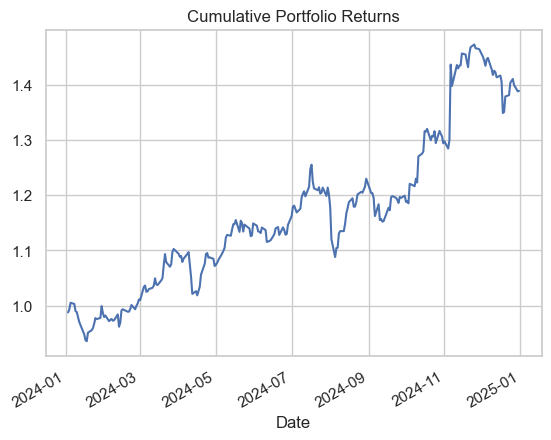

In [370]:
cumulative_simple_returns.plot(title="Cumulative Portfolio Returns")
plt.show()

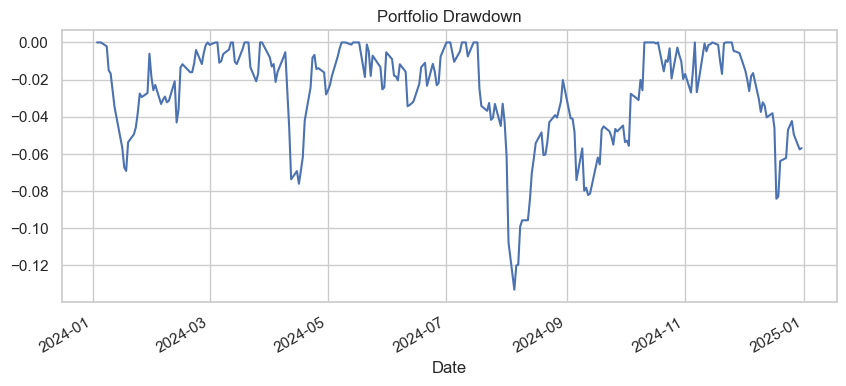

In [371]:
drawdown = (cumulative_simple_returns / cumulative_simple_returns.cummax()) - 1
drawdown.plot(figsize=(10,4), title='Portfolio Drawdown')
plt.show()

In [372]:
# Calmar Ratio
calmar_ratio=annualized_simple_return/max_drawdown
print(calmar_ratio)

3.173221874484494


In [373]:
# Treynor Ratio
treynor_ratio=(annualized_simple_return-risk_free_rate)/beta
print(treynor_ratio)

0.39304274520839855


In [374]:
# Value At Risk(Historical Method)=> Potential loss in your portfolio
portfolio_value=1000000
var_90=np.percentile(portfolio_simple_returns, 10)*portfolio_value
var_95=np.percentile(portfolio_simple_returns, 5)*portfolio_value
var_99=np.percentile(portfolio_simple_returns, 1)*portfolio_value
print(var_90)
print(var_95)
print(var_99)

-12293.433139878
-19626.73856124532
-28840.7165416558


In [375]:
from scipy.stats import norm
mu = portfolio_simple_returns.mean()
sigma = portfolio_simple_returns.std()
var_90_param = norm.ppf(0.10, mu, sigma) * portfolio_value
var_95_param = norm.ppf(0.05, mu, sigma) * portfolio_value
var_99_param = norm.ppf(0.01, mu, sigma) * portfolio_value
print(var_90_param)
print(var_95_param)
print(var_99_param)

-15986.76698758798
-20915.742963674922
-30161.682165718245


In [376]:
# Expected Shortfall
c_var=portfolio_simple_returns[portfolio_simple_returns<=np.percentile(portfolio_simple_returns, 5)].mean()*portfolio_value
print(c_var)

-27557.842882802197


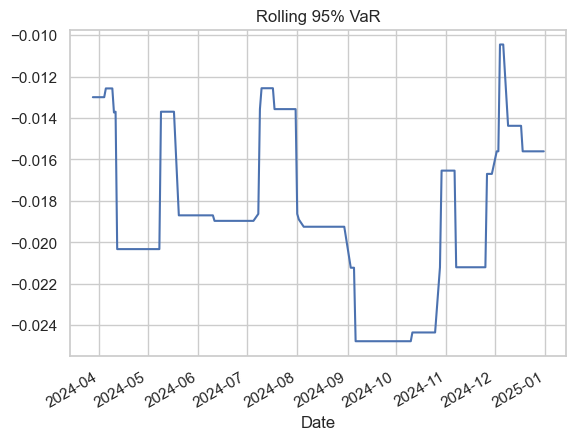

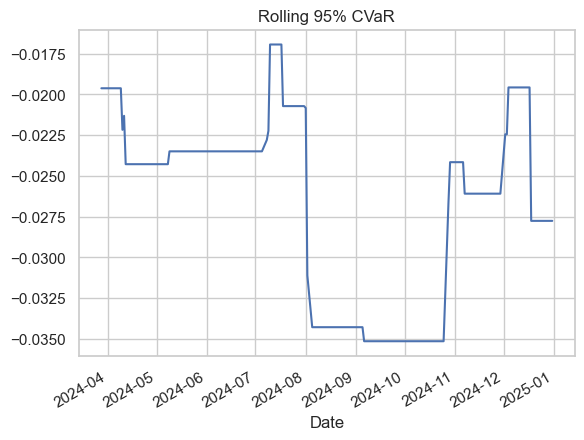

In [377]:
# Rolling var and cvar
window = 60
rolling_var = portfolio_simple_returns.rolling(window).quantile(0.05)
rolling_cvar = portfolio_simple_returns.rolling(window).apply(
    lambda x: x[x <= np.percentile(x, 5)].mean(),
    raw=False
)
rolling_var.plot(title='Rolling 95% VaR')
plt.show()

rolling_cvar.plot(title='Rolling 95% CVaR')
plt.show()